In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## read the track file

In [2]:
data = pd.read_excel('saola.xlsx')


In [3]:
def from_YMDH(x:str):
    # parse the string and convert to a 'datetime' object
    return datetime.strptime(x[0:13],'%Y-%m-%d %H')

In [4]:
data['datetime'] = data['datetime'].apply(from_YMDH)
data.head()

,datetime,longtitude,latitude,wind speed,pressure,7ji fengquan,10ji fengquan,moving direction,moving speed
0,2023-08-24 14:00:00,124.7,20.3,18,998,150,0,0,0
1,2023-08-24 17:00:00,124.6,20.4,23,990,150,0,0,0
2,2023-08-24 20:00:00,124.0,20.4,25,985,150,0,0,0
3,2023-08-24 23:00:00,123.7,20.2,25,985,150,0,0,0
4,2023-08-25 02:00:00,124.0,20.0,25,985,150,0,0,0


## select the desired data

In [5]:
date_sel = data[data['datetime']>= datetime(2023,8,30,0)].reset_index()

In [6]:
def date_format_func(x, pos):
    # x is the tick value, and pos is the tick position
    date_obj = pd.to_datetime(x)
    formatted_date = date_obj.strftime("%Y-%m-%d %H:%M")
    return formatted_date

In [7]:
def toTime(x):
    return x.strftime('%m/%d:%H')

Below is for the hurricane track plot in the domain plot.

In [12]:
'''
file_path = 'output.txt'
# Select the columns you want to print
columns_to_print = ['longtitude', 'latitude']
date_sel[columns_to_print][1::3].to_csv(file_path, sep='\t', index=False, header=True)
print(f"The selected columns '{', '.join(columns_to_print)}' have been written to '{file_path}'.")
'''

'\nfile_path = \'output.txt\'\n# Select the columns you want to print\ncolumns_to_print = [\'longtitude\', \'latitude\']\ndate_sel[columns_to_print][1::3].to_csv(file_path, sep=\'\t\', index=False, header=True)\nprint(f"The selected columns \'{\', \'.join(columns_to_print)}\' have been written to \'{file_path}\'.")\n'

## Plot

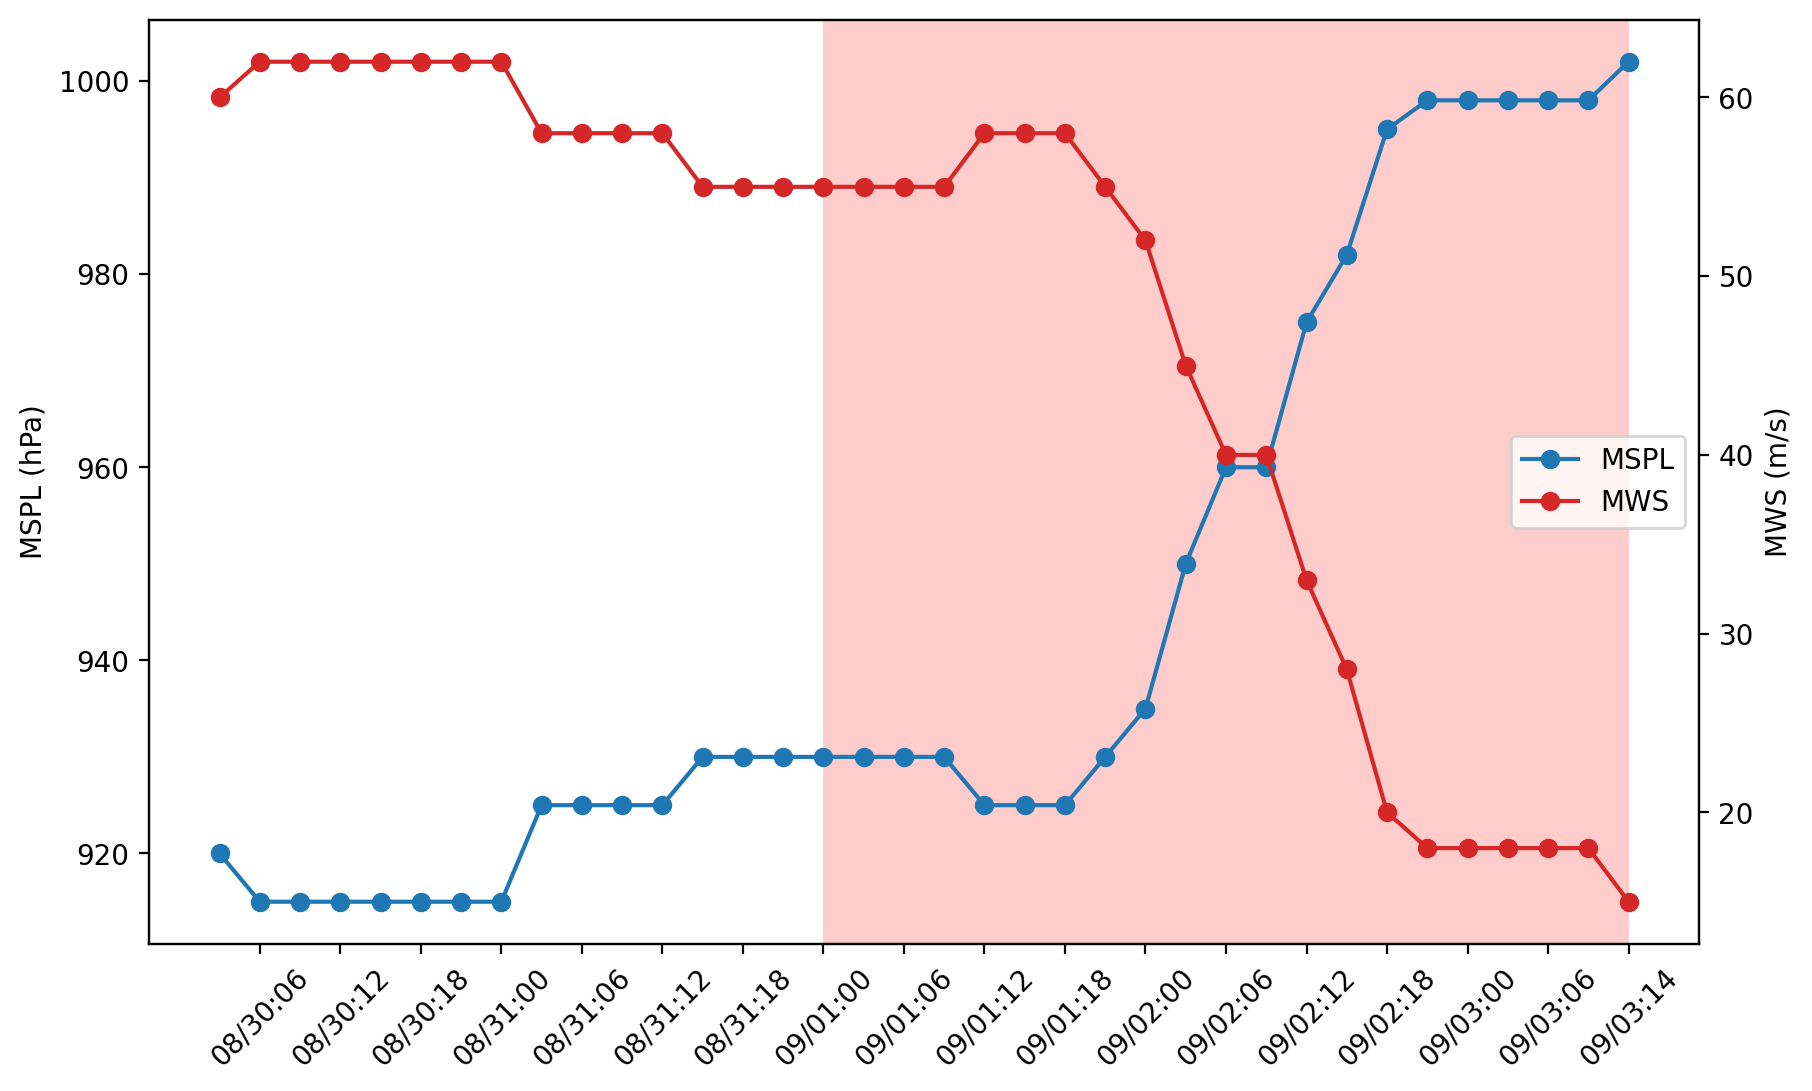

In [28]:
fig, ax1 = plt.subplots(figsize=(10,6), dpi= 200 )
ax1.plot(date_sel['datetime'][1::3].apply(toTime), date_sel['pressure'][1::3], label = 'MSPL', \
        linestyle = '-', marker = 'o', c = 'tab:blue')
ax1.set_ylabel('MSPL (hPa)')

#date_formatter = FuncFormatter(date_format_func)
#ax1.xaxis.set_major_formatter(date_formatter)

plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2.plot(date_sel['datetime'][1::3].apply(toTime), date_sel['wind speed'][1::3], label = 'MWS', \
        linestyle = '-', marker = 'o',c = 'tab:red')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right')
ax2.set_ylabel('MWS (m/s)')


# Set x-axis tick positions and labels for every 3rd element
x_ticks = date_sel['datetime'].apply(toTime)[4::6]
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_ticks) #, rotation=90)

marker_index = date_sel['datetime'].apply(toTime).tolist().index('09/01:00')
sel_date = date_sel['datetime'].apply(toTime)
ax1.axvspan(sel_date[marker_index], sel_date.iloc[-1], facecolor='red', alpha=0.2)

#plt.show()
plt.savefig('MSPL_MSP_typhoon.png')